In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("cm_dataset_2.csv", delimiter=",")
K = [2,3,4,5]
custom_colors = ['red', 'blue', 'green', 'purple', 'orange']
custom_colors_voronoi = ['black','red', 'blue', 'green', 'purple', 'orange']
init_centroids = data[np.random.choice(range(len(data)), 5, replace=False)]
# plt.scatter(data[:, 0], data[:, 1], c='black', label='Data Points')

In [3]:
def voronoi(points, data_range):
    x_min, y_min = data_range[:, 0].min(), data_range[:, 1].min()
    x_max, y_max = data_range[:, 0].max(), data_range[:, 1].max()

    x = np.linspace(x_min, x_max, 500)
    y = np.linspace(y_min, y_max, 500)
    xv, yv = np.meshgrid(x, y)

    voronoi_regions = np.zeros_like(xv, dtype=int)

    for i in range(xv.shape[0]):
        for j in range(xv.shape[1]):
            dist = np.sum((points - np.array([xv[i, j], yv[i, j]])) ** 2, axis=1)
            voronoi_regions[i, j] = np.argmin(dist) + 1

    return voronoi_regions

[[ 1.7152 -1.7307]
 [ 4.3802 -9.9841]]


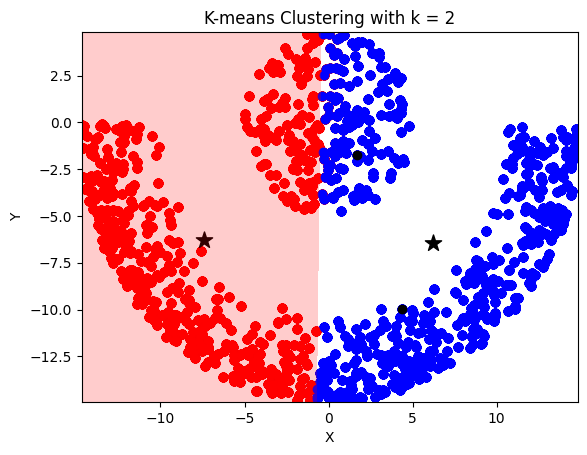

[[ 1.7152 -1.7307]
 [ 4.3802 -9.9841]
 [-4.154   2.5968]]


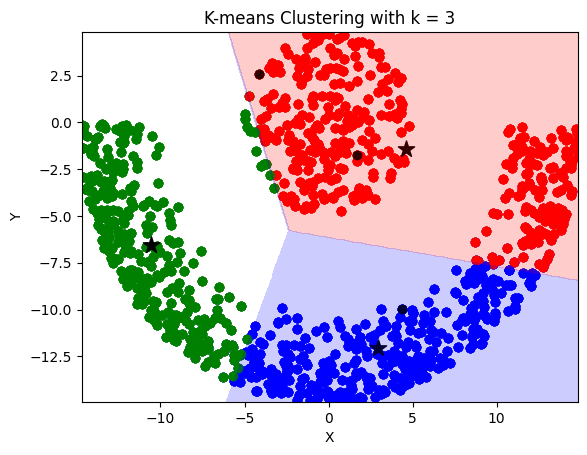

[[  1.7152  -1.7307]
 [  4.3802  -9.9841]
 [ -4.154    2.5968]
 [ -7.6235 -11.217 ]]


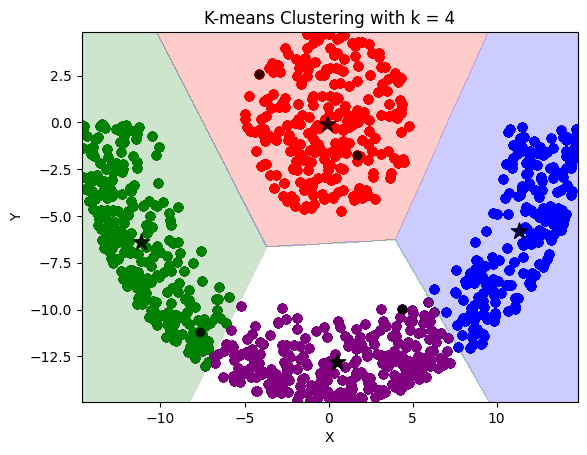

[[  1.7152  -1.7307]
 [  4.3802  -9.9841]
 [ -4.154    2.5968]
 [ -7.6235 -11.217 ]
 [-10.658  -10.378 ]]


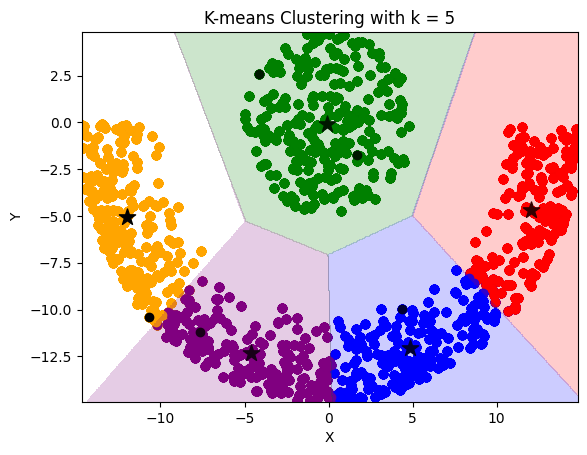

In [4]:

for k in K:
    centroids = init_centroids[:k]
    print(centroids)
    max_iter = 100    
    errors = []
    og_centroids = centroids

    for _ in range(max_iter) :
        labels = np.argmin(np.linalg.norm(data[:, None] - centroids, axis=2), axis=1)
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        error = np.sum(np.linalg.norm(data - new_centroids[labels], axis=1))
        errors.append(error)
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
        # colors = plt.cm.Spectral(np.linspace(0, 1, k))
        colors = custom_colors[:k]
        for cluster_label, color in zip(range(k), colors):
            cluster_points = data[labels == cluster_label]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], marker='o', label=f'Cluster {cluster_label + 1} - Initialization')
    
    plt.scatter(og_centroids[:, 0], og_centroids[:, 1], c='black', marker='o', label='Random Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=150, label='mu')

    voronoi_regions = voronoi(centroids, data)
    
    # Define x and y within the loop
    x = np.linspace(data[:, 0].min(), data[:, 0].max(), 500)
    y = np.linspace(data[:, 1].min(), data[:, 1].max(), 500)
    
    # plt.contourf(x, y, voronoi_regions, levels=np.arange(k + 1) - 0.5, cmap='viridis', alpha=0.3)
    plt.contourf(x, y, voronoi_regions, levels=np.arange(k + 1) - 0.5, colors=custom_colors_voronoi[:k], alpha=0.2)
    
    

    plt.title('K-means Clustering with k = '+ str(k))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
